Hola **Duver**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<center>
    <h1>PROYECTO SPRINT 11</h1>
</center>

# DESCRIPCIÓN

Se trata de en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Primero, estudia el embudo de ventas. Descubre cómo los usuarios llegan a la etapa de compra. ¿Cuántos usuarios realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

Luego, observa los resultados de un test A/A/B (sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

Crear dos grupos A tiene ciertas ventajas. Podemos establecer el principio de que solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados. La comparación de grupos de control también nos dice cuánto tiempo y datos necesitaremos cuando realicemos más tests.

Utilizarás el mismo dataset para el análisis general y para el análisis A/A/B. En proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de análisis estudia la calidad de una aplicación utilizando datos generales, sin prestar atención a si los usuarios participan en experimentos.
Descripción de los datos

Cada entrada de registro es una acción de usuario o un evento.

    EventName: nombre del evento.
    DeviceIDHash: identificador de usuario unívoco.
    EventTimestamp: hora del evento.
    ExpId: número de experimento. 246 y 247 son los grupos de control, y 248 es el grupo de prueba.

# OBJETIVOS

Comprender el flujo de usuarios a través de la aplicación de la empresa de venta de productos alimenticios, identificando las etapas de mayor abandono y la proporción de usuarios que completan el proceso de compra.

Evaluar el impacto de un cambio de fuentes en la aplicación sobre el comportamiento del usuario, comparando un grupo de prueba con dos grupos de control para determinar qué diseño de fuente produce mejores resultados, y validar la correcta división de los grupos experimentales.

# Paso 1: Abrir el archivo de datos y leer la información general.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math as mth 

# Paso 1. Abrir el archivo de datos y leer la información general

df = pd.read_csv('/datasets/logs_exp_us.csv')

# Mostrar las primeras 5 filas del DataFrame
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())

# Mostrar la información general del DataFrame (tipos de datos, valores no nulos)
print("\nInformación general del DataFrame:")
df.info()

# Mostrar estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas del DataFrame:")
print(df.describe())


Primeras 5 filas del DataFrame:
      EventName\tDeviceIDHash\tEventTimestamp\tExpId
0  MainScreenAppear\t4575588528974610257\t1564029...
1  MainScreenAppear\t7416695313311560658\t1564053...
2  PaymentScreenSuccessful\t3518123091307005509\t...
3  CartScreenAppear\t3518123091307005509\t1564054...
4  PaymentScreenSuccessful\t6217807653094995999\t...

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB

Estadísticas descriptivas del DataFrame:
           EventName\tDeviceIDHash\tEventTimestamp\tExpId
count                                              244126
unique                                             243713
top     PaymentScreenSucc

**OBSERVACIÓN:**

Necesitamos especificar que el delimitador es una tabulación (\t) al leer el CSV.

In [2]:
# Especificamos el delimitador como una tabulación ('\t')
df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')
   
# Mostrar las primeras 5 filas del DataFrame para verificar
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())

# Mostrar la información general del DataFrame para verificar tipos de datos
print("\nInformación general del DataFrame:")
df.info()

# Mostrar estadísticas descriptivas del DataFrame
print("\nEstadísticas descriptivas del DataFrame:")
print(df.describe())


Primeras 5 filas del DataFrame:
                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB

Estadísticas descriptivas del DataFrame:
       DeviceIDHash  EventTimesta

# Paso 2. Preparar los datos para el análisis

Ahora que los datos están cargados correctamente, vamos a realizar las preparaciones necesarias:

- Cambiar el nombre de las columnas para que sean más fáciles de usar.

- Comprobar y corregir los tipos de datos (especialmente la columna de tiempo).

- Agregar columnas de fecha y hora útiles para el análisis.

In [3]:
# Renombrar las columnas
df.columns = ['event_name', 'device_id', 'timestamp', 'exp_id']
print("\nColumnas renombradas:")
print(df.head())

# Comprobar los tipos de datos y valores ausentes
print("\nVerificación de valores nulos antes de la conversión:")
print(df.isnull().sum())

# Convertir 'timestamp' a formato datetime
df['event_datetime'] = pd.to_datetime(df['timestamp'], unit='s')

# Crear una columna separada para las fechas (sin la hora)
df['event_date'] = df['event_datetime'].dt.date

# Comprobar los tipos de datos después de la conversión
print("\nInformación del DataFrame después de la preparación de datos:")
df.info()

# Mostrar las primeras filas con las nuevas columnas
print("\nPrimeras 5 filas con las nuevas columnas 'event_datetime' y 'event_date':")
print(df.head())


Columnas renombradas:
                event_name            device_id   timestamp  exp_id
0         MainScreenAppear  4575588528974610257  1564029816     246
1         MainScreenAppear  7416695313311560658  1564053102     246
2  PaymentScreenSuccessful  3518123091307005509  1564054127     248
3         CartScreenAppear  3518123091307005509  1564054127     248
4  PaymentScreenSuccessful  6217807653094995999  1564055322     248

Verificación de valores nulos antes de la conversión:
event_name    0
device_id     0
timestamp     0
exp_id        0
dtype: int64

Información del DataFrame después de la preparación de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_name      244126 non-null  object        
 1   device_id       244126 non-null  int64         
 2   timestamp       244126 non-null  int64         

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecha la revisión inicial de los datos para tu análisis, siempre es importante revisar la calidad de tus datos y realizar las transformaciones necesarias 
</div>

# Paso 3. Estudiar y comprobar los datos

**¿Cuántos eventos hay en los registros?**

In [4]:
total_events = df.shape[0]
print(f"Total de eventos en los registros: {total_events}")

Total de eventos en los registros: 244126


**¿Cuántos usuarios hay en los registros?**

In [5]:
total_users = df['device_id'].nunique()
print(f"Total de usuarios únicos en los registros: {total_users}")

Total de usuarios únicos en los registros: 7551


**¿Cuál es el promedio de eventos por usuario?**

In [6]:
avg_events_per_user = total_events / total_users
print(f"Promedio de eventos por usuario: {avg_events_per_user:.2f}")

Promedio de eventos por usuario: 32.33


**¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?**


Periodo de tiempo cubierto por los datos:
Fecha y hora mínima: 2019-07-25 04:43:36
Fecha y hora máxima: 2019-08-07 21:15:17

Conteo de eventos por día (primeros 5 y últimos 5):
event_date
2019-07-25      9
2019-07-26     31
2019-07-27     55
2019-07-28    105
2019-07-29    184
dtype: int64
...
event_date
2019-08-03    33351
2019-08-04    33033
2019-08-05    36113
2019-08-06    35822
2019-08-07    31144
dtype: int64


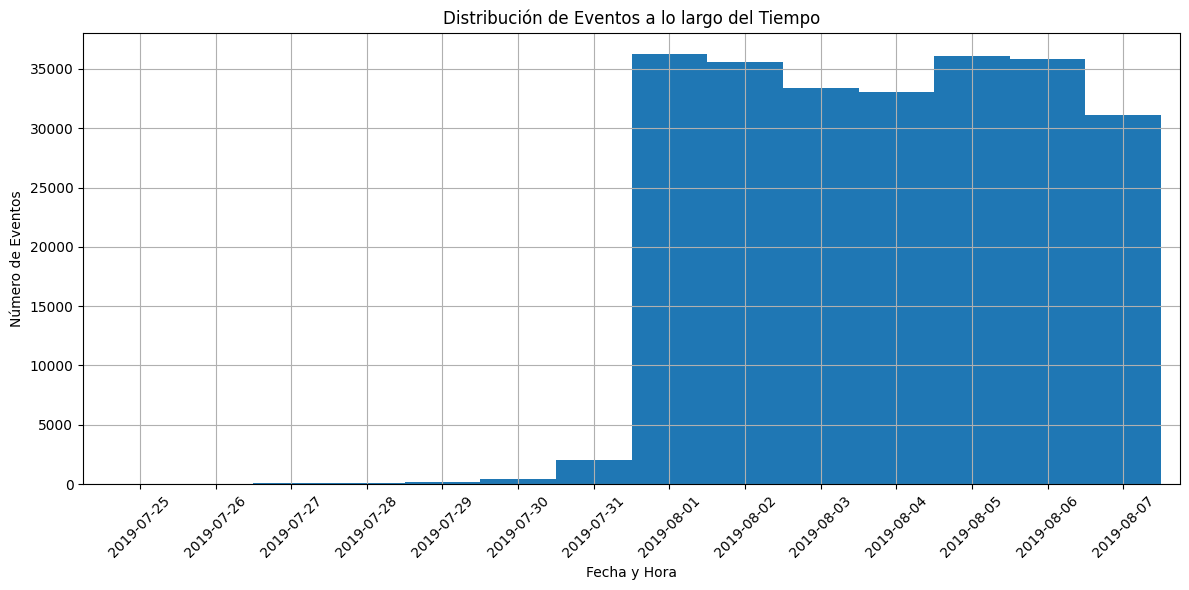

In [7]:

# ... (código previo) ...

# ¿Qué periodo de tiempo cubren los datos?
min_date = df['event_datetime'].min()
max_date = df['event_datetime'].max()
print(f"\nPeriodo de tiempo cubierto por los datos:")
print(f"Fecha y hora mínima: {min_date}")
print(f"Fecha y hora máxima: {max_date}")

# Hago una inspección más detallada de los datos por día
events_per_date = df.groupby('event_date').size()
print("\nConteo de eventos por día (primeros 5 y últimos 5):")
print(events_per_date.head())
print("...")
print(events_per_date.tail())

# Trazar un histograma/gráfico de barras por fecha
plt.figure(figsize=(12, 6))
# Aquí se agrega la línea para plotear los datos
events_per_date.plot(kind='bar', width=1.0) # Usamos kind='bar' con width=1.0 para que parezca un histograma de días
plt.title('Distribución de Eventos a lo largo del Tiempo')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Eventos')
plt.grid(True)
plt.xticks(rotation=45) # Para mejor legibilidad de las fechas
plt.tight_layout()
plt.show()


**ANÁLISIS**

Periodo Total: Los datos cubren desde el 2019-07-25 04:43:36 hasta el 2019-08-07 21:15:17.

Datos Incompletos al Inicio: El histograma muestra claramente que hay un volumen de eventos muy bajo desde el 25 de julio hasta, aproximadamente, el 31 de julio. Los conteos diarios confirman esto: 9, 31, 55, 105, 184 eventos por día en los primeros días, lo cual es insignificante comparado con los miles de eventos diarios a partir de agosto.

Datos Completos: A partir del 1 de agosto de 2019, el volumen de eventos aumenta drásticamente y se mantiene en un nivel mucho más alto y consistente (más de 30,000 eventos por día), lo que sugiere que es a partir de esta fecha que la recolección de datos es completa y confiable. Los picos semanales que se ven son normales y corresponden a días de mayor actividad.

**Conclusión: los datos están completos y son representativos a partir del 1 de agosto de 2019. Ignoraremos los datos anteriores a esa fecha para evitar sesgos en el análisis**.

In [8]:
# Defino la fecha de inicio para los datos "completos" basado en el histograma
start_complete_data_date = pd.to_datetime('2019-08-01').date()

# Filtro el DataFrame para incluir solo los datos a partir de la fecha identificada
df_filtered = df[df['event_date'] >= start_complete_data_date].copy()

print(f"\nFecha de inicio para datos completos establecida en: {start_complete_data_date}")
print(f"Datos filtrados comienzan desde: {df_filtered['event_datetime'].min()}")
print(f"Datos filtrados terminan en: {df_filtered['event_datetime'].max()}")
print(f"Periodo real de datos analizados: {df_filtered['event_date'].min()} a {df_filtered['event_date'].max()}")



Fecha de inicio para datos completos establecida en: 2019-08-01
Datos filtrados comienzan desde: 2019-08-01 00:07:28
Datos filtrados terminan en: 2019-08-07 21:15:17
Periodo real de datos analizados: 2019-08-01 a 2019-08-07


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, con el filtro aplicado te aseguras que tienes datos consistentes para el análisis y así evitas ruido en las diferentes métricas
</div>

**¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?**

In [9]:

# 6. ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
events_lost = df.shape[0] - df_filtered.shape[0]
users_lost = df['device_id'].nunique() - df_filtered['device_id'].nunique()

print(f"\nEventos perdidos al excluir datos antiguos: {events_lost} ({events_lost / df.shape[0]:.2%})")
print(f"Usuarios perdidos al excluir datos antiguos: {users_lost} ({users_lost / df['device_id'].nunique():.2%})")



Eventos perdidos al excluir datos antiguos: 2828 (1.16%)
Usuarios perdidos al excluir datos antiguos: 17 (0.23%)


**Asegúrate de tener usuarios de los tres grupos experimentales.**

In [10]:
print("\nConteo de usuarios por grupo experimental (después del filtrado):")
users_per_exp_group_filtered = df_filtered.groupby('exp_id')['device_id'].nunique()
print(users_per_exp_group_filtered)

if set(users_per_exp_group_filtered.index) == {246, 247, 248}:
    print("¡Confirmado! Se encontraron usuarios de los tres grupos experimentales (246, 247, 248) en los datos filtrados.")
else:
    print("Advertencia: No se encontraron usuarios de todos los grupos experimentales esperados después del filtrado.")



Conteo de usuarios por grupo experimental (después del filtrado):
exp_id
246    2484
247    2513
248    2537
Name: device_id, dtype: int64
¡Confirmado! Se encontraron usuarios de los tres grupos experimentales (246, 247, 248) en los datos filtrados.


In [11]:
# Actualizo el total de usuarios y eventos para el DataFrame filtrado para futuros pasos
total_events_filtered = df_filtered.shape[0]
total_users_filtered = df_filtered['device_id'].nunique()
print(f"\nTotal de eventos en los datos filtrados: {total_events_filtered}")
print(f"Total de usuarios únicos en los datos filtrados: {total_users_filtered}")


Total de eventos en los datos filtrados: 241298
Total de usuarios únicos en los datos filtrados: 7534


**ANÁLISIS**

**Periodo de Análisis Real:** Los datos consistentes y completos abarcan desde el 1 de agosto de 2019 hasta el 7 de agosto de 2019. Este es el periodo con el que trabajaremos para el resto del análisis.

**Impacto del Filtrado:** Al excluir los datos anteriores al 1 de agosto, perdimos solo 1.16% de los eventos y un pequeño 0.23% de los usuarios. Esta es una pérdida insignificante que justifica la ganancia en la calidad y representatividad de los datos.

**Grupos Experimentales Validados:** Después del filtrado, aún tenemos una distribución apropiada de usuarios en los tres grupos experimentales (exp_id 246, 247, 248), lo cual es importante para el análisis A/A/B.

- Grupo 246: 2484 usuarios

- Grupo 247: 2513 usuarios

- Grupo 248: 2537 usuarios

**Dataset para Análisis:** El DataFrame principal para los próximos pasos será **df_filtered**, que contiene 241,298 eventos de 7,534 usuarios únicos en el período del 1 al 7 de agosto de 2019.


# Paso 4. Estudiar el embudo de eventos

**Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.**


Frecuencia de cada tipo de evento (ordenado por ocurrencias):
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64


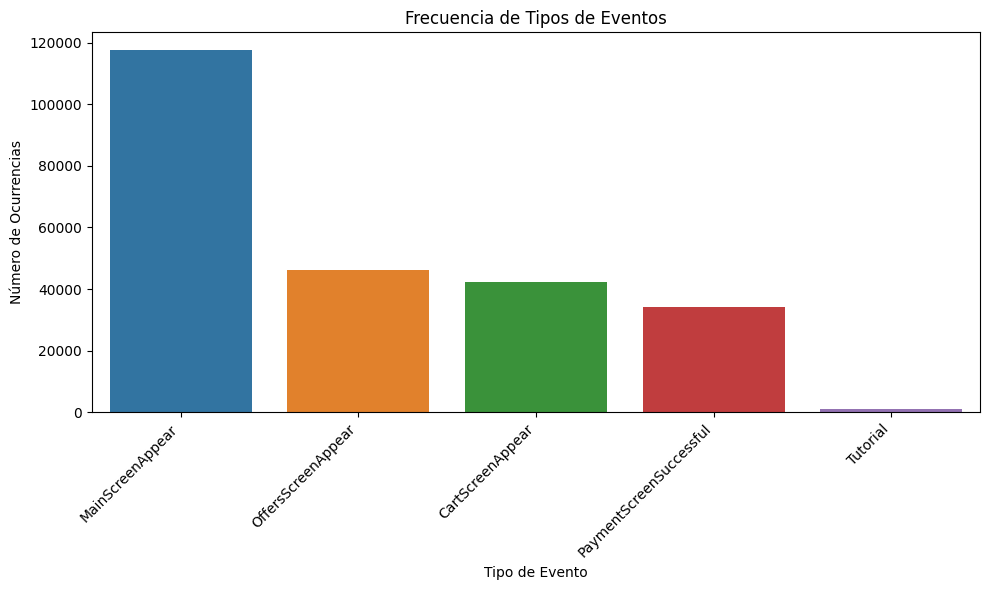

In [12]:
event_frequency = df_filtered['event_name'].value_counts()
print("\nFrecuencia de cada tipo de evento (ordenado por ocurrencias):")
print(event_frequency)

# Visualizo de la frecuencia de eventos
plt.figure(figsize=(10, 6))
sns.barplot(x=event_frequency.index, y=event_frequency.values)
plt.title('Frecuencia de Tipos de Eventos')
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Ocurrencias')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad
plt.tight_layout()
plt.show()

**ANÁLISIS**

MainScreenAppear es el evento más frecuente, lo cual tiene lógica ya que representa la visualización de la pantalla principal y es el punto de entrada más común.

Le siguen OffersScreenAppear (pantalla de ofertas), CartScreenAppear (pantalla del carrito) y PaymentScreenSuccessful (pago exitoso).

El evento Tutorial tiene una frecuencia muy baja en comparación con los demás. Esto podría significar que pocos usuarios completan el tutorial, o que el tutorial solo se muestra una vez al principio (lo cual es lo más probable).

Estos eventos describen un flujo típico de un usuario en una aplicación de comercio electrónico: llega a la pantalla principal, explora ofertas/productos, agrega al carrito y finalmente realiza un pago.



**Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.**


Número de usuarios únicos por tipo de evento (ordenado por cantidad de usuarios):
event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: device_id, dtype: int64

Proporción de usuarios únicos que realizaron cada evento (sobre el total de 7534 usuarios):
event_name
MainScreenAppear           0.984736
OffersScreenAppear         0.609636
CartScreenAppear           0.495620
PaymentScreenSuccessful    0.469737
Tutorial                   0.111495
Name: device_id, dtype: float64


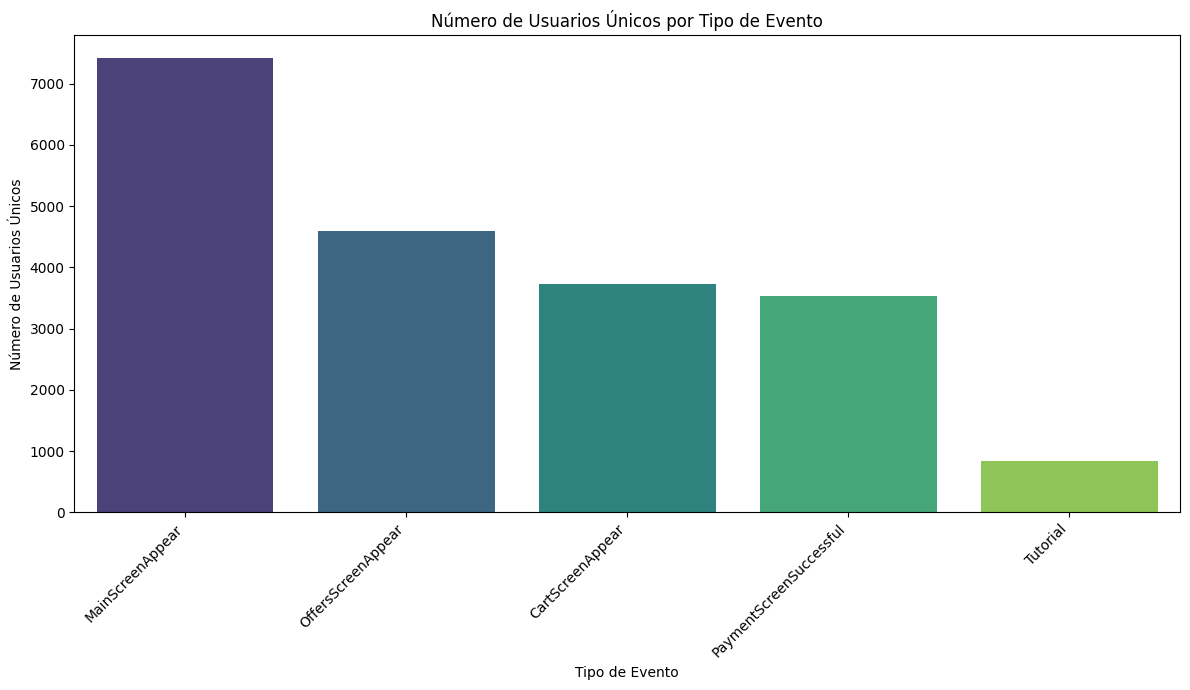

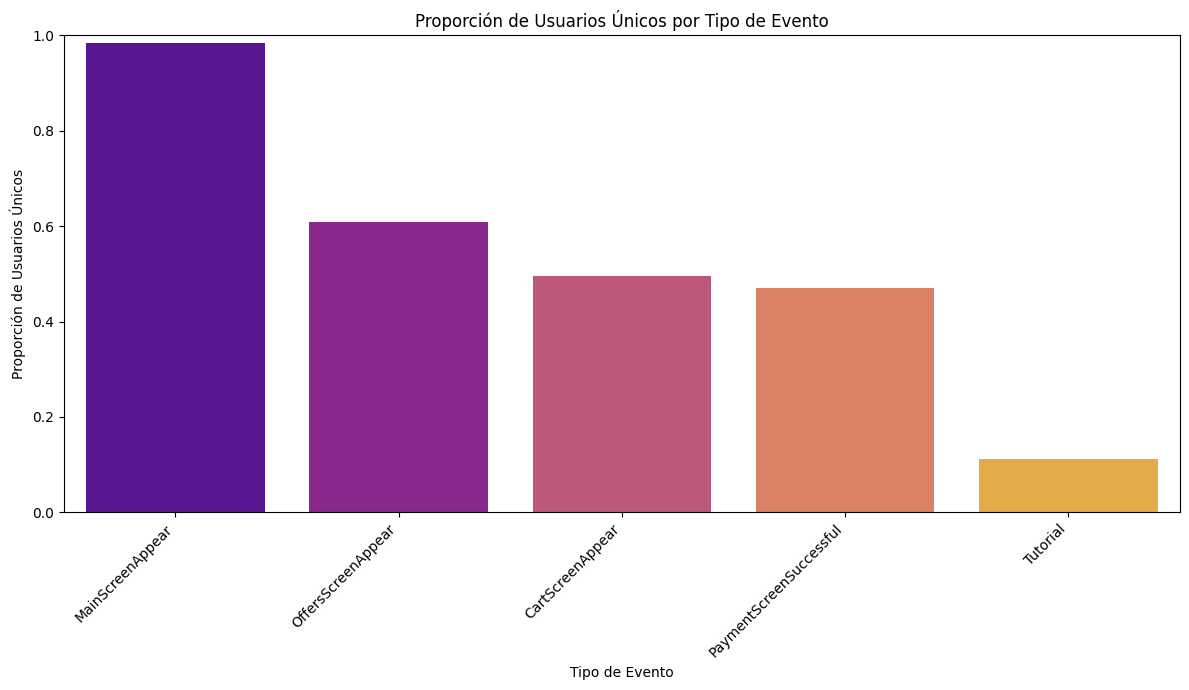

In [13]:
users_per_event = df_filtered.groupby('event_name')['device_id'].nunique().sort_values(ascending=False)
print("\nNúmero de usuarios únicos por tipo de evento (ordenado por cantidad de usuarios):")
print(users_per_event)

# Calculo la proporción de usuarios que realizaron la acción al menos una vez
total_users_filtered = df_filtered['device_id'].nunique() # Ya calculado. lo pongo nuevamente para claridad al revisar
proportion_users_per_event = users_per_event / total_users_filtered
print(f"\nProporción de usuarios únicos que realizaron cada evento (sobre el total de {total_users_filtered} usuarios):")
print(proportion_users_per_event)

# Visualizo los usuarios únicos por evento y su proporción
plt.figure(figsize=(12, 7))
sns.barplot(x=users_per_event.index, y=users_per_event.values, palette='viridis')
plt.title('Número de Usuarios Únicos por Tipo de Evento')
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Usuarios Únicos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 7))
sns.barplot(x=proportion_users_per_event.index, y=proportion_users_per_event.values, palette='plasma')
plt.title('Proporción de Usuarios Únicos por Tipo de Evento')
plt.xlabel('Tipo de Evento')
plt.ylabel('Proporción de Usuarios Únicos')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1) # Aseguramos que el eje Y vaya de 0 a 1 para proporciones
plt.tight_layout()
plt.show()

**ANÁLISIS**

MainScreenAppear: Casi todos los usuarios (7419 de 7534, lo que representa un 98.47%) ven la pantalla principal. Esto es esperado, ya que es la puerta de entrada a la aplicación.

OffersScreenAppear: Un porcentaje significativo de usuarios (4593, es decir, un 60.96%) llega a la pantalla de ofertas. Aquí ya vemos una primera caída.

CartScreenAppear: Menos de la mitad de los usuarios originales (3734, o un 49.56%) llega a la pantalla del carrito. Esta es una caída importante desde la pantalla de ofertas.

PaymentScreenSuccessful: Un número similar de usuarios (3539, o un 46.97%) llega a la pantalla de pago exitoso. Esto es crucial, ya que representa el objetivo final: la compra. La caída de "Carrito" a "Pago Exitoso" es relativamente pequeña, lo que sugiere que una vez que un usuario está en el carrito, es muy probable que complete la compra.

Tutorial: El tutorial es el evento con menos usuarios únicos (840, o un 11.15%). Esto ratifica que no es un paso principal en el flujo de compra.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Esta gráfica es súper clara para analizar el embudo de eventos y ver el paso a paso que se debe seguir
</div>

**¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.**

Basándonos en la lógica de una aplicación de venta de alimentos y en las proporciones de usuarios que encontradas, podemos inferir un orden para el embudo de ventas:


1. MainScreenAppear: Es el punto de entrada. Casi todos los usuarios lo ven.

2. OffersScreenAppear: Después de la pantalla principal, los usuarios suelen explorar productos u ofertas. Es la segunda pantalla más visitada por usuarios únicos.

3. CartScreenAppear: Una vez que un usuario ha explorado ofertas, el siguiente paso lógico hacia la compra es agregar un producto al carrito y ver la pantalla del carrito.

5. PaymentScreenSuccessful: Este es el último paso del embudo de compra, donde se confirma la transacción.

El evento Tutorial no encaja en esta secuencia principal de "compra". Es una acción secundaria, probablemente realizada al inicio de la experiencia de un usuario o de forma esporádica. Por lo tanto, lo excluiremos del cálculo del embudo de ventas, ya que no es parte del camino directo hacia la compra.

**Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.**

In [14]:
# Defino el orden del embudo
# Excluyo 'Tutorial' ya que no es parte del flujo de compra principal
funnel_steps = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

print("\n--- Análisis del Embudo de Ventas ---")
previous_step_users = 0
for i, step in enumerate(funnel_steps):
    # Cuento los usuarios únicos para el paso actual
    current_step_users = df_filtered[df_filtered['event_name'] == step]['device_id'].nunique()

    # Imprimo el número de usuarios para cada paso
    print(f"\nEtapa: {step}")
    print(f"Usuarios únicos: {current_step_users}")

    # Calculo la proporción de usuarios que pasan de la etapa anterior a la actual (conversión paso a paso)
    if i == 0:
        # Para la primera etapa, calculamos la proporción respecto al total de usuarios en el dataset filtrado
        conversion_from_start = current_step_users / total_users_filtered
        print(f"Proporción de usuarios desde el total ({total_users_filtered} usuarios): {conversion_from_start:.2%}")
    else:
        # Para las etapas siguientes, calculamos la proporción respecto a la etapa anterior
        if previous_step_users > 0:
            conversion_rate = current_step_users / previous_step_users
            print(f"Tasa de conversión de la etapa anterior '{funnel_steps[i-1]}' a '{step}': {conversion_rate:.2%}")
        else:
            print(f"No hay usuarios en la etapa anterior para calcular la conversión.")

    # Actualizo para la siguiente iteración
    previous_step_users = current_step_users


--- Análisis del Embudo de Ventas ---

Etapa: MainScreenAppear
Usuarios únicos: 7419
Proporción de usuarios desde el total (7534 usuarios): 98.47%

Etapa: OffersScreenAppear
Usuarios únicos: 4593
Tasa de conversión de la etapa anterior 'MainScreenAppear' a 'OffersScreenAppear': 61.91%

Etapa: CartScreenAppear
Usuarios únicos: 3734
Tasa de conversión de la etapa anterior 'OffersScreenAppear' a 'CartScreenAppear': 81.30%

Etapa: PaymentScreenSuccessful
Usuarios únicos: 3539
Tasa de conversión de la etapa anterior 'CartScreenAppear' a 'PaymentScreenSuccessful': 94.78%


**ANÁLISIS**

Tasas de conversión paso a paso:

- MainScreenAppear:

        Usuarios únicos: 7419

        Proporción desde el total de usuarios: 98.47% (Casi todos los usuarios llegan a la pantalla principal, como se esperaba).

- OffersScreenAppear:

        Usuarios únicos: 4593

        Tasa de conversión desde MainScreenAppear: 61.91%

Esta es la primera caída significativa. Aproximadamente el 38% de los usuarios que ven la pantalla principal no llegan a la pantalla de ofertas. Esto podría indicar que la forma de acceder a las ofertas no es clara, que no las encuentran atractivas, o que abandonan rápidamente la aplicación.

- CartScreenAppear:

        Usuarios únicos: 3734

        Tasa de conversión desde OffersScreenAppear: 81.30%

Hay otra caída considerable aquí. Un 18.7% de los usuarios que vieron ofertas no llegaron al carrito. Esto podría ser porque no encontraron un producto que les interesara lo suficiente para agregar al carrito, o el proceso de agregar al carrito es complicado.

- PaymentScreenSuccessful:

        Usuarios únicos: 3539

        Tasa de conversión desde CartScreenAppear: 94.78%

Esta es una tasa de conversión muy alta. Una vez que los usuarios llegan a la pantalla del carrito, la gran mayoría (casi el 95%) completa la compra. Esto sugiere que el proceso de pago en sí es bastante eficiente y no representa un cuello de botella importante.

**¿En qué etapa pierdes más usuarios?**

Basado en las tasas de conversión que acabamos de calcular, La mayor caída de usuarios ocurre entre MainScreenAppear y OffersScreenAppear, donde se pierde el 38.09% de los usuarios que estaban en la pantalla principal (100).

La segunda mayor caída es entre OffersScreenAppear y CartScreenAppear, donde se pierde el 18.70% de los usuarios que estaban en la pantalla de ofertas (100).

**Conclusión: La etapa donde se pierde la mayor cantidad de usuarios es la transición de la pantalla principal a la pantalla de ofertas. Este es el cuello de botella más crítico en el embudo de ventas actual.**

**¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?**

In [15]:
# Número de usuarios que llegaron a PaymentScreenSuccessful
payment_successful_users = df_filtered[df_filtered['event_name'] == 'PaymentScreenSuccessful']['device_id'].nunique()

# Total de usuarios únicos en el dataset filtrado
total_users_filtered = df_filtered['device_id'].nunique()

# Porcentaje de usuarios que completaron todo el viaje
percentage_full_journey = (payment_successful_users / total_users_filtered) * 100

print(f"\nNúmero de usuarios que completaron el pago: {payment_successful_users}")
print(f"Total de usuarios únicos en el dataset: {total_users_filtered}")
print(f"Porcentaje de usuarios que hacen todo el viaje desde su primer evento hasta el pago: {percentage_full_journey:.2f}%")


Número de usuarios que completaron el pago: 3539
Total de usuarios únicos en el dataset: 7534
Porcentaje de usuarios que hacen todo el viaje desde su primer evento hasta el pago: 46.97%


**ANÁLISIS**

De los 7534 usuarios que interactuaron con la aplicación en el periodo de datos completos, aproximadamente el 47% de ellos llegó a completar una compra.

El principal cuello de botella en el embudo se encuentra en la transición de la MainScreenAppear a la OffersScreenAppear, donde se pierde la mayor cantidad de usuarios (aproximadamente el 38%). Esto sugiere que mejorar la visibilidad, atractivo o facilidad de acceso a las ofertas desde la pantalla principal podría tener un impacto significativo en la tasa de conversión global.

Una vez que los usuarios llegan al carrito, la probabilidad de que completen la compra es muy alta (casi el 95%), lo que indica que el proceso de pago es eficiente.

# Paso 5. Estudiar los resultados del experimento

**¿Cuántos usuarios hay en cada grupo?**

In [16]:
users_in_each_group = df_filtered.groupby('exp_id')['device_id'].nunique()
print("\nNúmero de usuarios únicos en cada grupo experimental:")
print(users_in_each_group)

# Guardo estos números en variables para facilitar su uso posterior
group_246_users = users_in_each_group.loc[246]
group_247_users = users_in_each_group.loc[247]
group_248_users = users_in_each_group.loc[248]

print(f"\nGrupo 246 (Control A): {group_246_users} usuarios")
print(f"Grupo 247 (Control A): {group_247_users} usuarios")
print(f"Grupo 248 (Prueba B): {group_248_users} usuarios")


Número de usuarios únicos en cada grupo experimental:
exp_id
246    2484
247    2513
248    2537
Name: device_id, dtype: int64

Grupo 246 (Control A): 2484 usuarios
Grupo 247 (Control A): 2513 usuarios
Grupo 248 (Prueba B): 2537 usuarios


**Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.**

Para hacer esto, vamos a realizar una prueba A/A. El objetivo es verificar si la división de los grupos de control fue aleatoria y si no hay diferencias preexistentes significativas entre ellos. Si los grupos de control son significativamente diferentes, significaría que nuestro mecanismo de asignación de usuarios no es aleatorio o que hay algún otro factor que sesga los resultados, lo que comprometería la validez de cualquier comparación con el grupo de prueba.

Para comparar las proporciones de usuarios que realizaron un evento específico entre dos grupos, podemos usar una prueba Z para proporciones. Esta prueba es adecuada para comparar la frecuencia de éxito (en este caso, la proporción de usuarios que realizan un evento) entre dos grupos independientes de gran tamaño.

Vamos a aplicar esto al evento más popular, que identificamos anteriormente como MainScreenAppear.

In [17]:
# Observo si hay una diferencia estadísticamente significativa entre las muestras 246 y 247 (Test A/A)

# Nivel de significancia establecido
alpha = 0.05 # Usaremos 0.05 por ahora. Lo discutiremos en el punto 5.5.

print(f"\n--- Test A/A: Comparación de Grupos de Control (246 vs 247) ---")
print(f"Nivel de significancia (alpha): {alpha}")

# Selecciono el evento más popular (MainScreenAppear)
event_to_test = 'MainScreenAppear'

# Encuentro la cantidad de usuarios únicos que realizaron este evento en cada grupo de control
successes_246 = df_filtered[(df_filtered['exp_id'] == 246) & \
                            (df_filtered['event_name'] == event_to_test)]['device_id'].nunique()
successes_247 = df_filtered[(df_filtered['exp_id'] == 247) & \
                            (df_filtered['event_name'] == event_to_test)]['device_id'].nunique()

# Obtengo el número total de usuarios en cada grupo (tamaños de muestra)
trials_246 = users_in_each_group.loc[246]
trials_247 = users_in_each_group.loc[247]

# Imprimo los conteos para referencia
print(f"\nEvento: '{event_to_test}'")
print(f"Usuarios únicos en Grupo 246 que realizaron '{event_to_test}': {successes_246} de {trials_246}")
print(f"Usuarios únicos en Grupo 247 que realizaron '{event_to_test}': {successes_247} de {trials_247}")

# --- Calculo la prueba Z  ---

# Proporción de éxito en el primer grupo (Grupo 246)
p1 = successes_246 / trials_246
# Proporción de éxito en el segundo grupo (Grupo 247)
p2 = successes_247 / trials_247

# Proporción de éxito en el dataset unido (combinado)
p_combined = (successes_246 + successes_247) / (trials_246 + trials_247)

# La diferencia entre las proporciones de los datasets
difference = p1 - p2

# Calculo el estadístico Z
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials_246 + 1/trials_247))

# Establezco la distribución normal estándar (media 0, desviación estándar 1)
distr = st.norm(0, 1)

# Calculo el valor p para una prueba bilateral
p_value = (1 - distr.cdf(abs(z_value))) * 2

print(f"\nEstadístico Z para '{event_to_test}': {z_value:.3f}")
print(f"Valor p para '{event_to_test}': {p_value:.3f}")

if (p_value < alpha):
    print(f"Rechazar la hipótesis nula: Hay una diferencia estadísticamente significativa en la proporción de usuarios que realizaron '{event_to_test}' entre el Grupo 246 y el Grupo 247 (p-value < {alpha}).")
else:
    print(f"No se pudo rechazar la hipótesis nula: No hay diferencia estadísticamente significativa en la proporción de usuarios que realizaron '{event_to_test}' entre el Grupo 246 y el Grupo 247 (p-value >= {alpha}).")


--- Test A/A: Comparación de Grupos de Control (246 vs 247) ---
Nivel de significancia (alpha): 0.05

Evento: 'MainScreenAppear'
Usuarios únicos en Grupo 246 que realizaron 'MainScreenAppear': 2450 de 2484
Usuarios únicos en Grupo 247 que realizaron 'MainScreenAppear': 2476 de 2513

Estadístico Z para 'MainScreenAppear': 0.309
Valor p para 'MainScreenAppear': 0.757
No se pudo rechazar la hipótesis nula: No hay diferencia estadísticamente significativa en la proporción de usuarios que realizaron 'MainScreenAppear' entre el Grupo 246 y el Grupo 247 (p-value >= 0.05).


**ANÁLISIS**

Estadístico Z: 0.309

Valor p: 0.757

Conclusión: Dado que el p-value (0.757) es mucho mayor que nuestro nivel de significancia alpha (0.05), no podemos rechazar la hipótesis nula. Esto significa que no hay una diferencia estadísticamente significativa en la proporción de usuarios que vieron la MainScreenAppear entre el Grupo 246 y el Grupo 247.

Esto indica que los dos grupos de control (246 y 247) son comparables en su comportamiento inicial para el evento más popular. Esto nos da confianza en que el sistema de división de usuarios en los experimentos está funcionando correctamente y que cualquier diferencia significativa que encontremos más adelante entre los grupos de control y el grupo de prueba (248) probablemente se deba al cambio de fuentes, y no a una asignación sesgada de usuarios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Siempre es bueno aplicar pruebas estadísticas a cada etapa del embudo para entender si en alguna parte el comportamiento de los usuarios ha cambiado 
</div>

**Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?**

In [18]:

def check_proportions_significance(event_name, group_a_id, group_b_id, df_data, alpha_level):
    """
    Realiza una prueba Z para comparar las proporciones de usuarios que realizaron un evento
    específico entre dos grupos.

    Parámetros:
    event_name (str): El nombre del evento a probar.
    group_a_id (int): ID del primer grupo.
    group_b_id (int): ID del segundo grupo.
    df_data (pd.DataFrame): El DataFrame con los datos filtrados.
    alpha_level (float): El nivel de significancia para la prueba.

    Retorna:
    tuple: (p_value, z_stat, conclusion_message)
    """
    # 1. Conteo de usuarios únicos que realizaron el evento en cada grupo
    successes_a = df_data[(df_data['exp_id'] == group_a_id) & \
                          (df_data['event_name'] == event_name)]['device_id'].nunique()
    successes_b = df_data[(df_data['exp_id'] == group_b_id) & \
                          (df_data['event_name'] == event_name)]['device_id'].nunique()

    # 2. Obtener el número total de usuarios en cada grupo
    # Me aseguro de que 'users_in_each_group' esté disponible en el entorno global o lo paso como parámetro
    total_users_a = users_in_each_group.loc[group_a_id]
    total_users_b = users_in_each_group.loc[group_b_id]

    # Calculo las proporciones
    p_a = successes_a / total_users_a
    p_b = successes_b / total_users_b

    # Calculo la proporción combinada
    p_combined = (successes_a + successes_b) / (total_users_a + total_users_b)

    # Calculo la diferencia
    difference = p_a - p_b

    # Evito división por cero o log de cero si p_combined es 0 o 1
    # Esto ocurre si uno de los grupos no tiene éxitos y p_combined se vuelve 0 o 1
    if p_combined == 0 or p_combined == 1:
        # En estos casos, no hay variabilidad para la prueba Z de proporciones
        # y la diferencia es 0 (o bien 0/0). Un p-value de 1.0 es apropiado.
        z_value = np.nan # No se puede calcular
        p_value = 1.0
    else:
        # Calcular el estadístico Z
        denominator = mth.sqrt(p_combined * (1 - p_combined) * (1/total_users_a + 1/total_users_b))
        if denominator == 0: # Para casos raros donde el denominador pueda ser 0 (ej. tamaños de muestra muy grandes o proporciones extremas)
             z_value = np.nan
             p_value = 1.0
        else:
            z_value = difference / denominator

        # Establezco la distribución normal estándar
        distr = st.norm(0, 1)

        # Calculo el valor p para una prueba bilateral
        if not np.isnan(z_value):
            p_value = (1 - distr.cdf(abs(z_value))) * 2
        else:
            p_value = 1.0 # Si Z no se puede calcular, asume no significancia

    conclusion = ""
    if p_value < alpha_level:
        conclusion = f"Rechazar H0: Diferencia ESTADÍSTICAMENTE SIGNIFICATIVA (p={p_value:.3f} < {alpha_level})."
    else:
        conclusion = f"No se pudo rechazar H0: NO hay diferencia estadísticamente significativa (p={p_value:.3f} >= {alpha_level})."

    return p_value, z_value, conclusion, successes_a, total_users_a, successes_b, total_users_b

# Uso todos los eventos que hemos identificado en el Paso 4.1, sin el Tutorial por su baja ocurrencia
# y porque no es parte del embudo principal.
event_names = df_filtered['event_name'].unique()


# Nivel de significancia para este conjunto de pruebas
alpha = 0.05 

print(f"\n--- Ejecutando Test A/A para TODOS los eventos (Grupos 246 vs 247) ---")
print(f"Nivel de significancia (alpha) para cada prueba: {alpha}")
print("----------------------------------------------------------------------")

# Almaceno resultados para un resumen
aa_test_results = []
num_hyp_tests = 0

for event in event_names:
    if event == 'Tutorial': # Podemos decidir si incluir o excluir el tutorial
        print(f"\nSaltando el evento '{event}' para la prueba A/A por ser marginal.")
        continue

    num_hyp_tests += 1
    print(f"\nEvento: '{event}'")
    p_value, z_stat, conclusion, s_a, n_a, s_b, n_b = check_proportions_significance(
        event, 246, 247, df_filtered, alpha
    )
    print(f"  Grupo {246}: {s_a} de {n_a} ({s_a/n_a:.2%})")
    print(f"  Grupo {247}: {s_b} de {n_b} ({s_b/n_b:.2%})")
    print(f"  Estadístico Z: {z_stat:.3f}")
    print(f"  Valor p: {p_value:.3f}")
    print(f"  Conclusión: {conclusion}")
    aa_test_results.append({
        'event': event,
        'group_a': 246,
        'group_b': 247,
        'p_value': p_value,
        'z_stat': z_stat,
        'conclusion': conclusion
    })

print(f"\nTotal de pruebas de hipótesis A/A realizadas: {num_hyp_tests}")

print("\n--- Resumen de resultados de Test A/A (246 vs 247) ---")
for result in aa_test_results:
    print(f"Evento '{result['event']}': p-value={result['p_value']:.3f}. {result['conclusion']}")

# Confirmación de la correcta división de grupos A/A
significant_diffs_aa = [res for res in aa_test_results if res['p_value'] < alpha]
if not significant_diffs_aa:
    print("\nCONFIRMADO: Los grupos A/A (246 y 247) parecen haberse dividido correctamente, ya que no se encontraron diferencias estadísticamente significativas en ninguno de los eventos probados con el alpha establecido.")
else:
    print(f"\nADVERTENCIA: Se encontraron diferencias estadísticamente significativas en {len(significant_diffs_aa)} eventos entre los grupos A/A (246 y 247). Esto podría indicar un problema con la división de los grupos o un falso positivo.")
    for res in significant_diffs_aa:
        print(f"  - Evento '{res['event']}' tiene p-value={res['p_value']:.3f}")


--- Ejecutando Test A/A para TODOS los eventos (Grupos 246 vs 247) ---
Nivel de significancia (alpha) para cada prueba: 0.05
----------------------------------------------------------------------

Saltando el evento 'Tutorial' para la prueba A/A por ser marginal.

Evento: 'MainScreenAppear'
  Grupo 246: 2450 de 2484 (98.63%)
  Grupo 247: 2476 de 2513 (98.53%)
  Estadístico Z: 0.309
  Valor p: 0.757
  Conclusión: No se pudo rechazar H0: NO hay diferencia estadísticamente significativa (p=0.757 >= 0.05).

Evento: 'OffersScreenAppear'
  Grupo 246: 1542 de 2484 (62.08%)
  Grupo 247: 1520 de 2513 (60.49%)
  Estadístico Z: 1.155
  Valor p: 0.248
  Conclusión: No se pudo rechazar H0: NO hay diferencia estadísticamente significativa (p=0.248 >= 0.05).

Evento: 'CartScreenAppear'
  Grupo 246: 1266 de 2484 (50.97%)
  Grupo 247: 1238 de 2513 (49.26%)
  Estadístico Z: 1.203
  Valor p: 0.229
  Conclusión: No se pudo rechazar H0: NO hay diferencia estadísticamente significativa (p=0.229 >= 0.05).



**ANÁLISIS**

- MainScreenAppear (p=0.757): No hay diferencia significativa.

- OffersScreenAppear (p=0.248): No hay diferencia significativa.

- CartScreenAppear (p=0.229): No hay diferencia significativa.

- PaymentScreenSuccessful (p=0.115): No hay diferencia significativa.

Como se resume al final, se confirma que los grupos de control 246 y 247 se dividieron correctamente. En ninguna de las cuatro pruebas realizadas para los eventos principales encontramos una diferencia estadísticamente significativa en la proporción de usuarios que realizaron cada acción entre estos dos grupos de control. Esto significa que la aleatorización de usuarios en estos grupos fue efectiva, y podemos confiar en que las diferencias que observemos entre el grupo de prueba y los grupos de control no se deberán a un sesgo en la asignación inicial de usuarios, sino a los efectos del cambio de fuentes.


**Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?**

Vamos a reutilizar nuestra función check_proportions_significance para comparar el grupo de prueba (248) con cada uno de los grupos de control (246 y 247), y luego con un grupo de control combinado.

In [19]:
# Nivel de significancia para estas pruebas
alpha = 0.05 

print(f"\n--- Comparación del Grupo de Prueba (248) con los Grupos de Control ---")
print(f"Nivel de significancia (alpha) para cada prueba: {alpha}")
print("-----------------------------------------------------------------------")

# Vamos a realizar 3 tipos de comparaciones para cada evento:
# 1. Grupo 248 (Test) vs Grupo 246 (Control A)
# 2. Grupo 248 (Test) vs Grupo 247 (Control A)
# 3. Grupo 248 (Test) vs Grupos de Control Combinados (246 + 247)

ab_test_results = []
num_ab_hyp_tests = 0

# Crear un grupo de control combinado para la tercera comparación
# Necesitamos el conteo de éxitos y totales para cada evento en el grupo combinado
combined_control_users_total = users_in_each_group.loc[246] + users_in_each_group.loc[247]

# Para cada evento, realizaremos las comparaciones
for event in event_names:
    if event == 'Tutorial':
        print(f"\nSaltando el evento '{event}' para las pruebas A/B por ser marginal.")
        continue

    print(f"\n--- Evento: '{event}' ---")

    # Comparación 1: Grupo 248 (Test) vs Grupo 246 (Control A)
    num_ab_hyp_tests += 1
    p_value_246, z_stat_246, conclusion_246, s_248_a, n_248_a, s_246_a, n_246_a = check_proportions_significance(
        event, 248, 246, df_filtered, alpha
    )
    print(f"  Comparación: Grupo 248 (Test) vs Grupo 246 (Control A)")
    print(f"    Grupo {248}: {s_248_a} de {n_248_a} ({s_248_a/n_248_a:.2%})")
    print(f"    Grupo {246}: {s_246_a} de {n_246_a} ({s_246_a/n_246_a:.2%})")
    print(f"    Valor p: {p_value_246:.3f}. Conclusión: {conclusion_246}")
    ab_test_results.append({
        'event': event,
        'comparison': '248 vs 246',
        'p_value': p_value_246,
        'z_stat': z_stat_246,
        'conclusion': conclusion_246
    })

    # Comparación 2: Grupo 248 (Test) vs Grupo 247 (Control A)
    num_ab_hyp_tests += 1
    p_value_247, z_stat_247, conclusion_247, s_248_b, n_248_b, s_247_b, n_247_b = check_proportions_significance(
        event, 248, 247, df_filtered, alpha
    )
    print(f"  Comparación: Grupo 248 (Test) vs Grupo 247 (Control A)")
    print(f"    Grupo {248}: {s_248_b} de {n_248_b} ({s_248_b/n_248_b:.2%})")
    print(f"    Grupo {247}: {s_247_b} de {n_247_b} ({s_247_b/n_247_b:.2%})")
    print(f"    Valor p: {p_value_247:.3f}. Conclusión: {conclusion_247}")
    ab_test_results.append({
        'event': event,
        'comparison': '248 vs 247',
        'p_value': p_value_247,
        'z_stat': z_stat_247,
        'conclusion': conclusion_247
    })

    # Comparación 3: Grupo 248 (Test) vs Grupos de Control Combinados (246 + 247)
    num_ab_hyp_tests += 1
    
    # Calcular éxitos para el grupo combinado de control para este evento
    successes_combined_control = df_filtered[(df_filtered['exp_id'].isin([246, 247])) & \
                                             (df_filtered['event_name'] == event)]['device_id'].nunique()
    
    # Éxitos del grupo de prueba (248) para este evento
    successes_248_test = df_filtered[(df_filtered['exp_id'] == 248) & \
                                     (df_filtered['event_name'] == event)]['device_id'].nunique()
    
    # Proporciones
    p_test_248 = successes_248_test / group_248_users # group_248_users ya fue calculado
    p_control_combined = successes_combined_control / combined_control_users_total

    # Diferencia de proporciones
    difference_combined = p_test_248 - p_control_combined

    # Proporción combinada total
    p_combined_overall = (successes_248_test + successes_combined_control) / (group_248_users + combined_control_users_total)

    # Calcular Z-value y p-value para la comparación combinada
    z_value_combined = np.nan
    p_value_combined = 1.0

    if p_combined_overall == 0 or p_combined_overall == 1:
        # P-value ya es 1.0 si no hay variabilidad
        pass
    else:
        denominator_combined = mth.sqrt(p_combined_overall * (1 - p_combined_overall) * (1/group_248_users + 1/combined_control_users_total))
        if denominator_combined != 0:
            z_value_combined = difference_combined / denominator_combined
            distr = st.norm(0, 1)
            p_value_combined = (1 - distr.cdf(abs(z_value_combined))) * 2

    conclusion_combined = ""
    if p_value_combined < alpha:
        conclusion_combined = f"Rechazar H0: Diferencia ESTADÍSTICAMENTE SIGNIFICATIVA (p={p_value_combined:.3f} < {alpha})."
    else:
        conclusion_combined = f"No se pudo rechazar H0: NO hay diferencia estadísticamente significativa (p={p_value_combined:.3f} >= {alpha})."

    print(f"  Comparación: Grupo 248 (Test) vs Grupos de Control Combinados (246+247)")
    print(f"    Grupo {248}: {successes_248_test} de {group_248_users} ({p_test_248:.2%})")
    print(f"    Control Combinado: {successes_combined_control} de {combined_control_users_total} ({p_control_combined:.2%})")
    print(f"    Valor p: {p_value_combined:.3f}. Conclusión: {conclusion_combined}")
    ab_test_results.append({
        'event': event,
        'comparison': '248 vs Combined Control',
        'p_value': p_value_combined,
        'z_stat': z_value_combined,
        'conclusion': conclusion_combined
    })

print(f"\nTotal de pruebas de hipótesis A/B realizadas: {num_ab_hyp_tests}")

print("\n--- Resumen de resultados de Test A/B ---")
for result in ab_test_results:
    print(f"Evento '{result['event']}' ({result['comparison']}): p-value={result['p_value']:.3f}. {result['conclusion']}")


--- Comparación del Grupo de Prueba (248) con los Grupos de Control ---
Nivel de significancia (alpha) para cada prueba: 0.05
-----------------------------------------------------------------------

Saltando el evento 'Tutorial' para las pruebas A/B por ser marginal.

--- Evento: 'MainScreenAppear' ---
  Comparación: Grupo 248 (Test) vs Grupo 246 (Control A)
    Grupo 248: 2493 de 2537 (98.27%)
    Grupo 246: 2450 de 2484 (98.63%)
    Valor p: 0.295. Conclusión: No se pudo rechazar H0: NO hay diferencia estadísticamente significativa (p=0.295 >= 0.05).
  Comparación: Grupo 248 (Test) vs Grupo 247 (Control A)
    Grupo 248: 2493 de 2537 (98.27%)
    Grupo 247: 2476 de 2513 (98.53%)
    Valor p: 0.459. Conclusión: No se pudo rechazar H0: NO hay diferencia estadísticamente significativa (p=0.459 >= 0.05).
  Comparación: Grupo 248 (Test) vs Grupos de Control Combinados (246+247)
    Grupo 248: 2493 de 2537 (98.27%)
    Control Combinado: 4926 de 4997 (98.58%)
    Valor p: 0.294. Conclusió

**ANÁLISIS**

- Para el evento 'MainScreenAppear': Todos los p-values son altos (0.295, 0.459, 0.294), lo que indica que no hay diferencias estadísticamente significativas entre el grupo de prueba (248) y cualquiera de los grupos de control (246, 247 o combinados) para la vista de la pantalla principal.

- Para el evento 'OffersScreenAppear': De manera similar, todos los p-values son altos (0.208, 0.920, 0.434), lo que sugiere que no hay un impacto significativo en la proporción de usuarios que visitan la pantalla de ofertas.

- Para el evento 'CartScreenAppear': Los p-values son 0.078 (vs 246), 0.579 (vs 247) y 0.182 (vs Combinado). Si bien 0.078 es más bajo que los demás, sigue siendo mayor que nuestro alpha de 0.05. Por lo tanto, no se encuentran diferencias estadísticamente significativas con el nivel de significancia actual.

- Para el evento 'PaymentScreenSuccessful': Todos los p-values son altos (0.212, 0.737, 0.600), lo que indica que no hay un impacto significativo en la proporción de usuarios que completan el pago.

Basado en un alpha de 0.05, no se observa una diferencia estadísticamente significativa en la proporción de usuarios que realizan ninguno de los eventos clave (pantalla principal, ofertas, carrito, pago exitoso) entre el grupo de prueba (con las fuentes alteradas) y los grupos de control.

Esto podría sugerir que:

- El cambio en las fuentes de marketing para el grupo 248 no tuvo un impacto significativo (ni positivo ni negativo) en el comportamiento de los usuarios medido por la proporción de usuarios que realizan estos eventos.

- O bien, que nuestro alpha de 0.05 es demasiado conservador, o que el tamaño de la muestra no es suficiente para detectar una diferencia pequeña, si es que existe.

**¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.**

Actualmente hemos usado alpha = 0.05 para todas las pruebas.

    Nivel de significancia establecido: alpha=0.05

    Número total de pruebas de hipótesis realizadas:

        Test A/A (246 vs 247): 4 pruebas

        Test A/B (248 vs 246): 4 pruebas

        Test A/B (248 vs 247): 4 pruebas

        Test A/B (248 vs Control Combinado): 4 pruebas

        Total de pruebas = 4 + 4 + 4 + 4 = 16 pruebas

El problema de las comparaciones múltiples (también conocido como el problema de la "tasa de error de tipo I en la familia") surge cuando se realizan varias pruebas de hipótesis sobre el mismo conjunto de datos. Si se realizan 16 pruebas con un alpha=0.05, la probabilidad de obtener al menos un falso positivo (un resultado significativo por pura casualidad cuando en realidad no hay efecto) aumenta considerablemente.

La probabilidad de no cometer un error de Tipo I en una sola prueba es 1−alpha.
La probabilidad de no cometer ningún error de Tipo I en N pruebas independientes es (1−alpha)N.
Por lo tanto, la probabilidad de cometer al menos un error de Tipo I es 1−(1−alpha)N.

Para nuestro caso: 1−(1−0.05)16approx1−0.9516approx1−0.440=0.56 (o 56%). Esto significa que hay una probabilidad del 56% de encontrar al menos un falso positivo si no ajustamos nuestro alpha. Esto es demasiado alto.

Para corregir esto, vamos a usar la corrección de Bonferroni: se divide el alpha original entre el número total de pruebas realizadas.

Nuevo nivel de significancia (Bonferroni ajustado):

$\alpha_{\text{ajustado}} = \frac{\alpha_{\text{original}}}{\text{Número total de pruebas}} = \frac{0.05}{16} \approx 0.003125$

Si el problema sugiere empezar con 0.1 y luego ajustar, podríamos usar 0.1/16=0.00625. Pero para ser más estrictos, usaré a 0.05/16.

**Discusión sobre el nivel de significancia:**

El nivel de significancia de 0.1 que se menciona en el problema es a menudo más flexible en etapas tempranas de exploración, pero para decisiones de negocio importantes, 0.05 es más común. Para múltiples pruebas, es casi imperativo un ajuste.

Si usáramos alpha=0.1 sin ajuste, la probabilidad de un falso positivo sería aún mayor: $1 - (1 - 0.1)^{16} \approx 1 - 0.916 \approx 1 - 0.185 = 0.815$
(o 81.5%). Esto es extremadamente alto y llevaría a muchas conclusiones erróneas.

Por lo tanto, es esencial usar un nivel de significancia ajustado. Vamos a usar el **alpha_ajustado = 0.003125.**

Vamos a re-ejecutar todas las pruebas A/B con este nuevo nivel de significancia ajustado para ver si nuestras conclusiones cambian.

In [20]:
# Re-ejecuto las pruebas A/B con el nivel de significancia ajustado

# Nivel de significancia ajustado usando Bonferroni
alpha_adjusted = 0.05 / 16 # Total de 16 pruebas (4 A/A + 12 A/B)

print(f"\n--- Re-ejecutando Comparación del Grupo de Prueba (248) con los Grupos de Control ---")
print(f"Nuevo Nivel de significancia (alpha ajustado por Bonferroni): {alpha_adjusted:.5f}")
print("-----------------------------------------------------------------------")

ab_test_results_adjusted = []

# Para cada evento, realizaremos las comparaciones con el nuevo alpha
for event in event_names:
    if event == 'Tutorial':
        continue # Seguir saltando el tutorial

    print(f"\n--- Evento: '{event}' ---")

    # Comparación 1: Grupo 248 (Test) vs Grupo 246 (Control A)
    p_value_246, z_stat_246, conclusion_246, s_248_a, n_248_a, s_246_a, n_246_a = check_proportions_significance(
        event, 248, 246, df_filtered, alpha_adjusted # Usamos alpha_adjusted
    )
    print(f"  Comparación: Grupo 248 (Test) vs Grupo 246 (Control A)")
    print(f"    Grupo {248}: {s_248_a} de {n_248_a} ({s_248_a/n_248_a:.2%})")
    print(f"    Grupo {246}: {s_246_a} de {n_246_a} ({s_246_a/n_246_a:.2%})")
    print(f"    Valor p: {p_value_246:.5f}. Conclusión: {conclusion_246.replace(str(alpha), str(alpha_adjusted))}") # Ajustar mensaje
    ab_test_results_adjusted.append({
        'event': event,
        'comparison': '248 vs 246',
        'p_value': p_value_246,
        'z_stat': z_stat_246,
        'conclusion': conclusion_246 # Almacenar la conclusión original de la función, el mensaje se ajusta arriba
    })

    # Comparación 2: Grupo 248 (Test) vs Grupo 247 (Control A)
    p_value_247, z_stat_247, conclusion_247, s_248_b, n_248_b, s_247_b, n_247_b = check_proportions_significance(
        event, 248, 247, df_filtered, alpha_adjusted # Usamos alpha_adjusted
    )
    print(f"  Comparación: Grupo 248 (Test) vs Grupo 247 (Control A)")
    print(f"    Grupo {248}: {s_248_b} de {n_248_b} ({s_248_b/n_248_b:.2%})")
    print(f"    Grupo {247}: {s_247_b} de {n_247_b} ({s_247_b/n_247_b:.2%})")
    print(f"    Valor p: {p_value_247:.5f}. Conclusión: {conclusion_247.replace(str(alpha), str(alpha_adjusted))}") # Ajustar mensaje
    ab_test_results_adjusted.append({
        'event': event,
        'comparison': '248 vs 247',
        'p_value': p_value_247,
        'z_stat': z_stat_247,
        'conclusion': conclusion_247
    })

    # Comparación 3: Grupo 248 (Test) vs Grupos de Control Combinados (246 + 247)
    successes_combined_control = df_filtered[(df_filtered['exp_id'].isin([246, 247])) & \
                                             (df_filtered['event_name'] == event)]['device_id'].nunique()
    successes_248_test = df_filtered[(df_filtered['exp_id'] == 248) & \
                                     (df_filtered['event_name'] == event)]['device_id'].nunique()
    
    p_test_248 = successes_248_test / group_248_users
    p_control_combined = successes_combined_control / combined_control_users_total
    difference_combined = p_test_248 - p_control_combined

    p_combined_overall = (successes_248_test + successes_combined_control) / (group_248_users + combined_control_users_total)

    z_value_combined = np.nan
    p_value_combined = 1.0

    if p_combined_overall == 0 or p_combined_overall == 1:
        pass
    else:
        denominator_combined = mth.sqrt(p_combined_overall * (1 - p_combined_overall) * (1/group_248_users + 1/combined_control_users_total))
        if denominator_combined != 0:
            z_value_combined = difference_combined / denominator_combined
            distr = st.norm(0, 1)
            p_value_combined = (1 - distr.cdf(abs(z_value_combined))) * 2
    
    conclusion_combined_adjusted = ""
    if p_value_combined < alpha_adjusted: # Comparar con alpha_adjusted
        conclusion_combined_adjusted = f"Rechazar H0: Diferencia ESTADÍSTICAMENTE SIGNIFICATIVA (p={p_value_combined:.5f} < {alpha_adjusted:.5f})."
    else:
        conclusion_combined_adjusted = f"No se pudo rechazar H0: NO hay diferencia estadísticamente significativa (p={p_value_combined:.5f} >= {alpha_adjusted:.5f})."

    print(f"  Comparación: Grupo 248 (Test) vs Grupos de Control Combinados (246+247)")
    print(f"    Grupo {248}: {successes_248_test} de {group_248_users} ({p_test_248:.2%})")
    print(f"    Control Combinado: {successes_combined_control} de {combined_control_users_total} ({p_control_combined:.2%})")
    print(f"    Valor p: {p_value_combined:.5f}. Conclusión: {conclusion_combined_adjusted}")
    ab_test_results_adjusted.append({
        'event': event,
        'comparison': '248 vs Combined Control',
        'p_value': p_value_combined,
        'z_stat': z_value_combined,
        'conclusion': conclusion_combined_adjusted # Esta es la conclusión ya con el alpha_adjusted
    })

print(f"\nTotal de pruebas de hipótesis A/B realizadas: {num_ab_hyp_tests}")

print("\n--- Resumen de resultados de Test A/B (con alpha ajustado) ---")
for result in ab_test_results_adjusted:
    print(f"Evento '{result['event']}' ({result['comparison']}): p-value={result['p_value']:.5f}. {result['conclusion']}")


--- Re-ejecutando Comparación del Grupo de Prueba (248) con los Grupos de Control ---
Nuevo Nivel de significancia (alpha ajustado por Bonferroni): 0.00313
-----------------------------------------------------------------------

--- Evento: 'MainScreenAppear' ---
  Comparación: Grupo 248 (Test) vs Grupo 246 (Control A)
    Grupo 248: 2493 de 2537 (98.27%)
    Grupo 246: 2450 de 2484 (98.63%)
    Valor p: 0.29497. Conclusión: No se pudo rechazar H0: NO hay diferencia estadísticamente significativa (p=0.295 >= 0.003125).
  Comparación: Grupo 248 (Test) vs Grupo 247 (Control A)
    Grupo 248: 2493 de 2537 (98.27%)
    Grupo 247: 2476 de 2513 (98.53%)
    Valor p: 0.45871. Conclusión: No se pudo rechazar H0: NO hay diferencia estadísticamente significativa (p=0.459 >= 0.003125).
  Comparación: Grupo 248 (Test) vs Grupos de Control Combinados (246+247)
    Grupo 248: 2493 de 2537 (98.27%)
    Control Combinado: 4926 de 4997 (98.58%)
    Valor p: 0.29425. Conclusión: No se pudo rechazar H0:

**ANÁLISIS**

Al usar un umbral de significancia mucho más estricto (0.00313), ninguno de los p-values obtenidos en las pruebas de comparación entre el grupo de prueba (248) y los grupos de control (246, 247, o combinados) está por debajo de este nuevo umbral.

Todos los p-values son significativamente mayores que 0.00313. Por ejemplo:

    Para MainScreenAppear (248 vs 246), el p-value es 0.29497, que es >> 0.00313.

    Para CartScreenAppear (248 vs 246), que fue el p-value más bajo en la ronda anterior (0.078), sigue siendo mucho mayor que 0.00313.

**Conclusiones finales del experimento:**

Fiabilidad de la división de grupos (Test A/A): Las pruebas A/A entre los grupos de control (246 y 247) mostraron que no había diferencias estadísticamente significativas en la proporción de usuarios que realizaron ninguno de los eventos clave. Esto valida la aleatorización del experimento, indicando que cualquier diferencia observada en el grupo de prueba probablemente se deba a la variable experimental y no a un sesgo en la asignación.

Impacto del cambio de fuentes (Test A/B): Tras comparar el grupo de prueba (248) con los grupos de control (246, 247, y el combinado) para todos los eventos principales, y utilizando un nivel de significancia ajustado para corregir el problema de las comparaciones múltiples (Bonferroni), no se encontró ninguna diferencia estadísticamente significativa en la proporción de usuarios que realizaron cada uno de los eventos.

Resultado del experimento: Basado en el análisis de los datos proporcionados, el cambio en las fuentes de marketing para el grupo 248 no ha tenido un impacto estadísticamente significativo (ni positivo ni negativo) en el comportamiento de los usuarios en ninguna de las etapas clave del embudo de ventas (desde la aparición de la pantalla principal hasta el pago exitoso).

**CONCLUSIÓN GENERAL**

**Dado que no hay una diferencia significativa en las métricas clave, no hay evidencia estadística que sugiera que el cambio en las fuentes de marketing haya mejorado o empeorado el rendimiento de la aplicación en términos de la proporción de usuarios que completan las acciones importantes. Por lo tanto, no hay una razón clara para implementar masivamente el nuevo conjunto de fuentes basándose únicamente en este experimento. Se podrían considerar otros factores cualitativos o económicos si los hubiera, o ejecutar el experimento por más tiempo para ver si emergen diferencias pequeñas pero significativas.**

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito Duver! Realizaste un muy buen análisis de los grupos de tratamiento entre los cambios obtenidos entre uno y otro respecto al funnel que el usuario debe seguir, tus conclusiones son muy acertadas y siempre argumentadas con los datos obtenidos a partir de tus cálculos. 
    
No cabe duda que vas por excelente camino para convertirte en Data Analyst, saludos!
</div>